### 타이타닉 EDA


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [6]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.26.4
2.2.2
0.13.2


NameError: name 'matplotlib' is not defined

In [7]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.10
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2024.12.16.0.35.48
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.3.0
audioread        

In [8]:
#!wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/kaggle/titanic/train.csv

--2024-12-24 01:42:52--  https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/kaggle/titanic/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.06s   

2024-12-24 01:42:53 (1.04 MB/s) - ‘train.csv’ saved [61194/61194]



In [11]:
df=pd.read_csv('train.csv')

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 각 칼럼별 정리가 필요함, 종류에

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [17]:
df.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


### 결측치, 없는 값이므로 채우거나 없애야함
결측치를 채우는 경우, 해당 이유가 필요함(통계적 이유, 최빈값, 지운 이유 등등)

In [21]:
df.isna().sum() #true면 값이 없는 것(=0)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

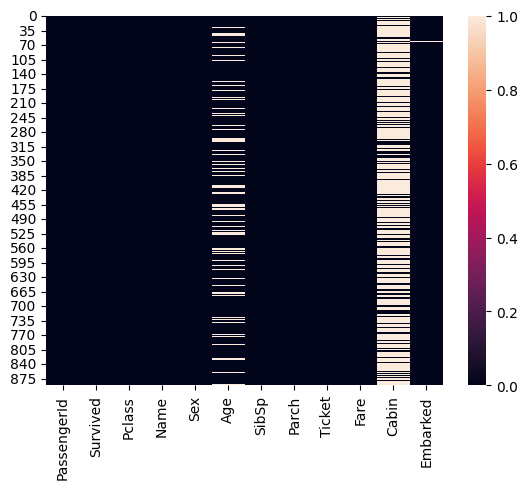

In [22]:
sns.heatmap(df.isna())#결측치가 존재하는 값을 보여줌

In [29]:
df.loc[df['Embarked'].isna(),:]#결측된 데이터에 대해 확인, 특정 칼럼이나 전체 읽어오기 가능

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [30]:
df.loc[df['Embarked'].isna(),["Sex","Age","Name"]]#결측된 데이터에 대해 확인, 특정 칼럼이나 전체 읽어오기 가능

,Sex,Age,Name
61,female,38.0,"Icard, Miss. Amelie"
829,female,62.0,"Stone, Mrs. George Nelson (Martha Evelyn)"


### survived 칼럼 분석

In [39]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

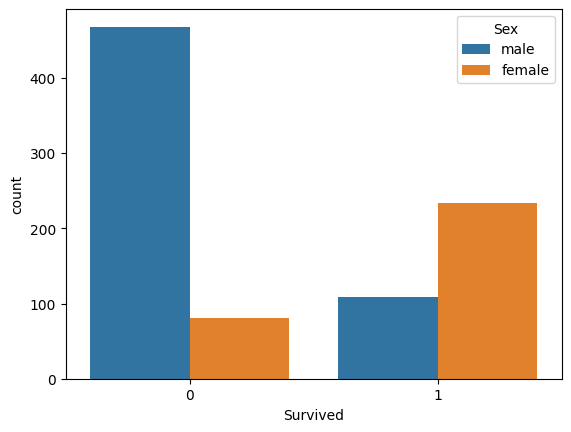

In [46]:
sns.countplot(data=df,x='Survived',hue='Sex')#생존에 대한 카운트 플롯, 성별에 따라 분류해서 카운트

In [52]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [53]:
result = df.groupby('Sex')[['Survived', 'Pclass','Age']].apply(lambda x: x.value_counts())
print(result)

Sex     Survived  Pclass  Age 
female  1         1       35.0    6
                  2       24.0    6
        0         3       18.0    5
        1         1       30.0    5
                          24.0    5
                                 ..
male    0         3       10.0    1
                          8.0     1
                  2       70.0    1
                          66.0    1
        1         3       45.0    1
Name: count, Length: 339, dtype: int64


###sex 칼럼


In [54]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

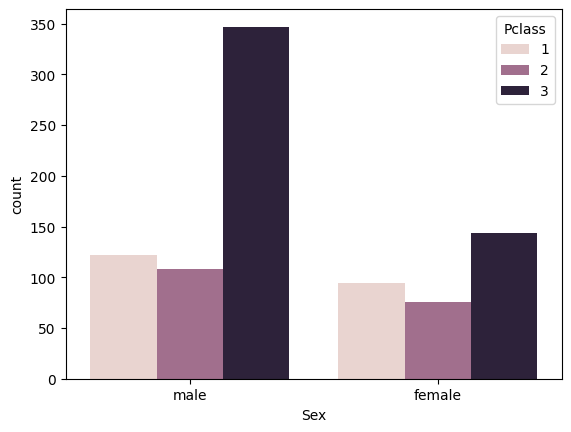

In [57]:
sns.countplot(data=df,x='Sex',hue='Pclass')

In [63]:
#result=df.groupby('Pclass')[['Sex']].apply(lambda x: x.value_counts())
df.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: count, dtype: int64

In [62]:
result

Sex,male,female
Pclass,,
1,122,94
2,108,76
3,347,144


<Axes: xlabel='Sex', ylabel='count'>

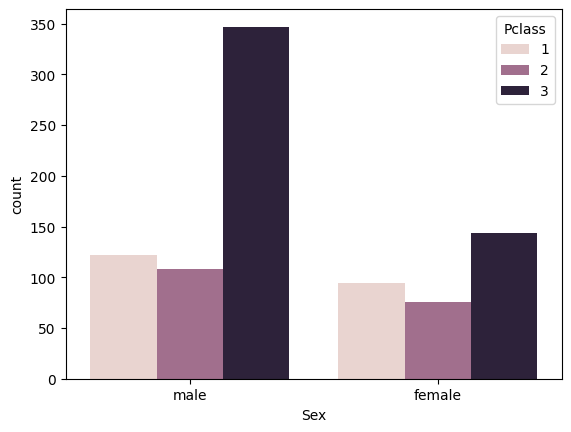

In [64]:
sns.countplot(data=df,x='Sex',hue='Pclass')

pclass 칼럼 분석

In [66]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [67]:
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

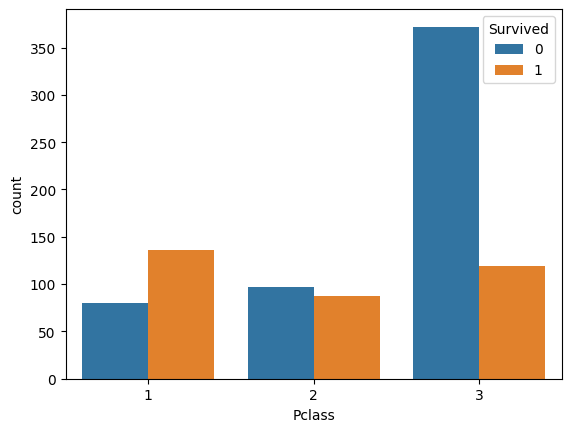

In [68]:
sns.countplot(data=df,x='Pclass',hue='Survived')

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### age 칼럼 분석


In [71]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: xlabel='Age', ylabel='Count'>

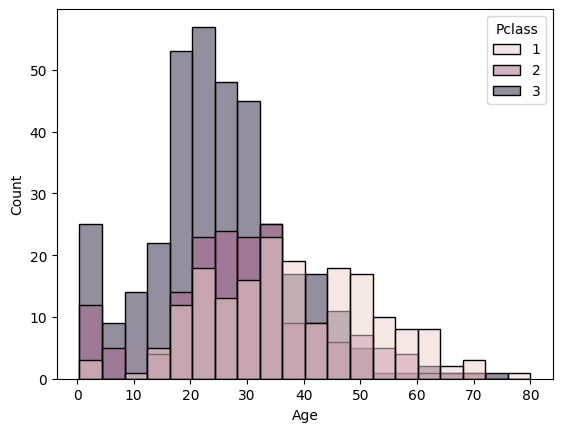

In [73]:
sns.histplot(data=df,x='Age',hue='Pclass')

<ipython-input-72-b93a8a34185f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Age'])


<Axes: ylabel='Density'>

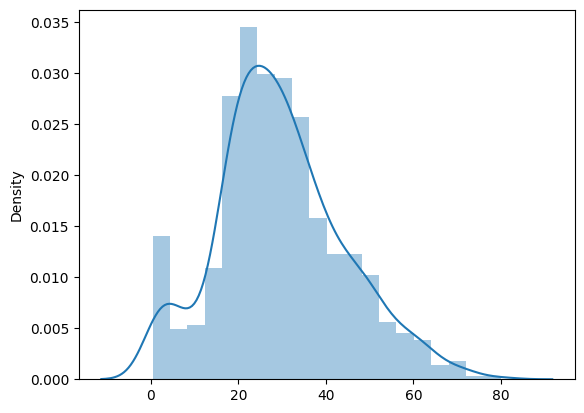

In [72]:
sns.distplot(x=df['Age']) #연속형 데이터를 범주형으로 바꿔서 사용가능

<Axes: ylabel='Age'>

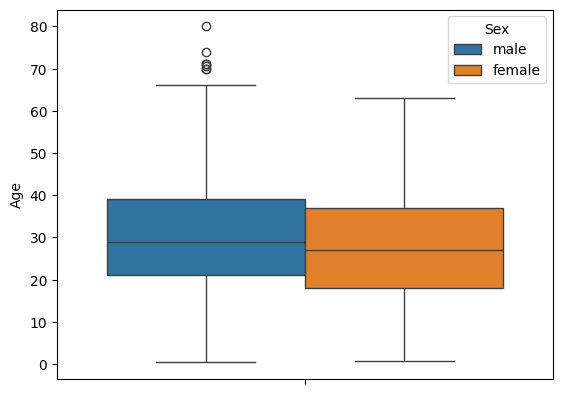

In [76]:
sns.boxplot(data=df,y='Age',hue='Sex')

<Axes: ylabel='Age'>

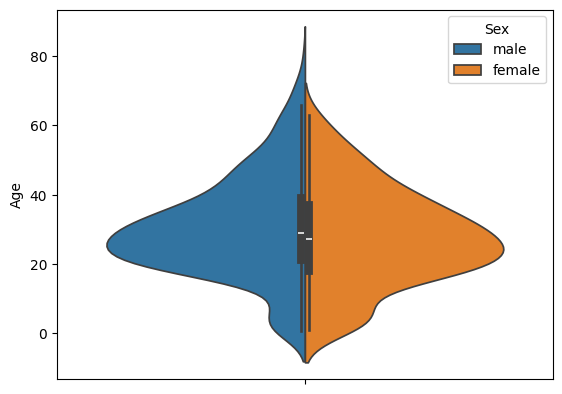

In [77]:
sns.violinplot(data=df,y='Age',hue='Sex',split=True)

In [78]:
df.groupby(['Sex','Pclass'])['Survived'].value_counts()

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: count, dtype: int64